In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score,accuracy_score

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Filling Missing values

In [5]:
for c in ['Gender','Married','Dependents','Self_Employed']:
     df[c].fillna(df[c].mode()[0], inplace=True)
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
for c in ['LoanAmount','Loan_Amount_Term','Credit_History']:
     df[c].fillna(df[c].mean(), inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Data Visualization

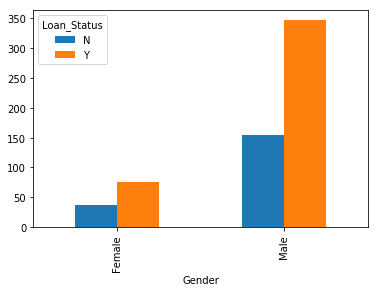

In [7]:
t = pd.crosstab(columns=df['Loan_Status'],index=df['Gender'])
t.plot(kind='bar')

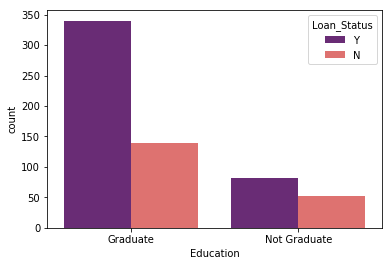

In [8]:
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='magma')

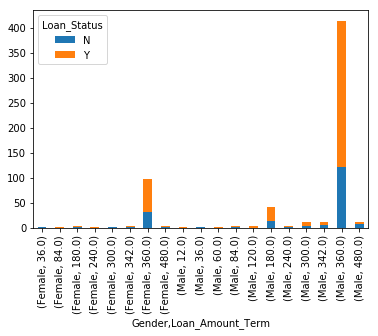

In [9]:
t = pd.crosstab(columns=df['Loan_Status'],index=[df['Gender'],df['Loan_Amount_Term']])
t.plot(kind='bar',stacked=True)

In [10]:
df.loc[:,'Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

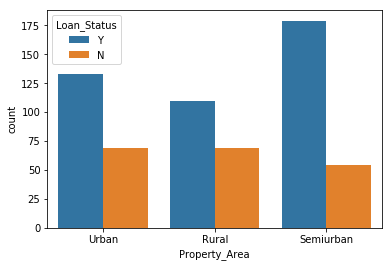

In [11]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

C:\Users\vedant khandelwal\Anaconda3\envs\dl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


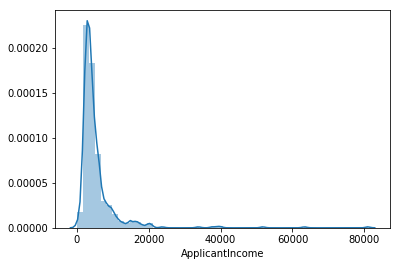

In [12]:
sns.distplot(df['ApplicantIncome'])

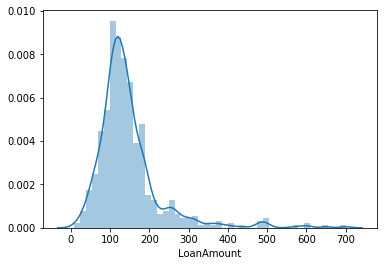

In [13]:
sns.distplot(df['LoanAmount'])

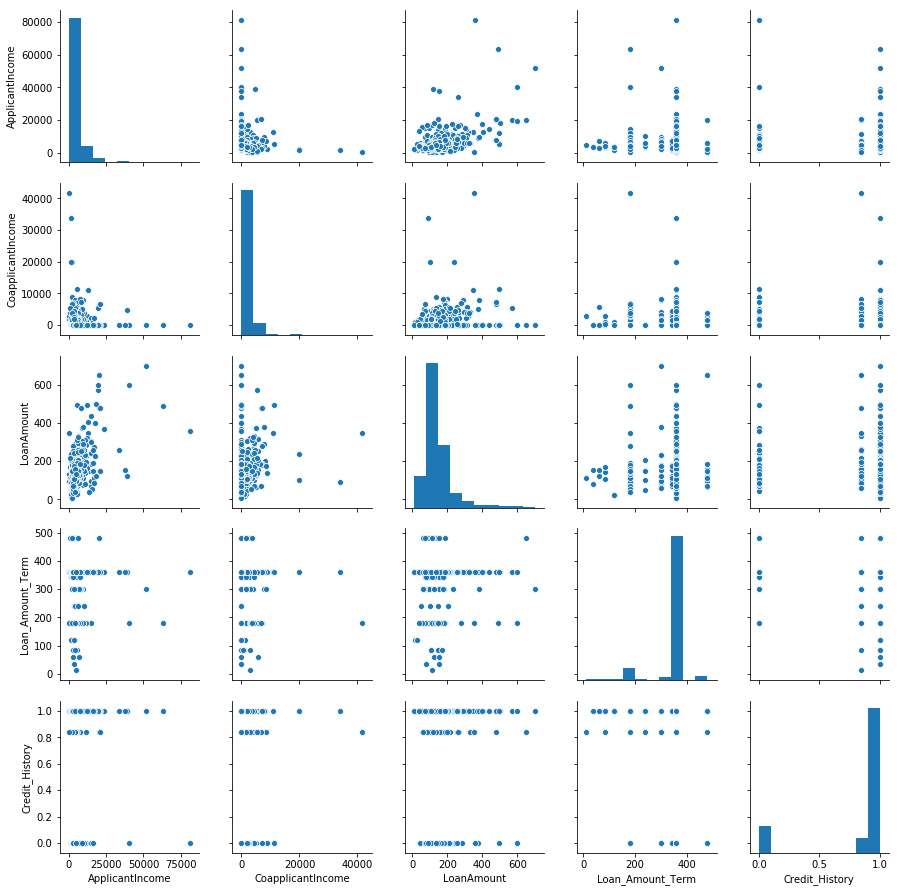

In [14]:
sns.pairplot(df)

In [ ]:
#Correlation of Continuous variables

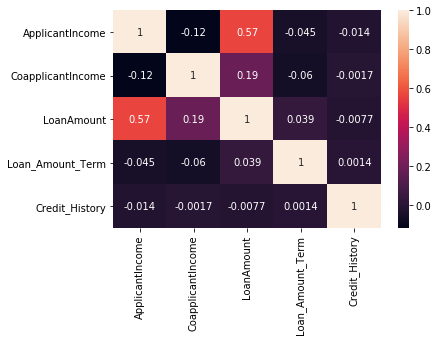

In [15]:
sns.heatmap(df.corr(),annot=True)

In [64]:
#Dummy variable creation

In [16]:
df2=pd.get_dummies(df,columns=['Gender','Married','Dependents','Property_Area','Education','Self_Employed','Loan_Status'],drop_first=True)
df2.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,0,1,1,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1,0,0,1


In [17]:
df2=df2.drop(['Loan_ID'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Loan_Status_Y              614 non-null uint8
dtypes: float64(4), int64(1), uint8(10)
memory usage: 30.1 KB


In [18]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,0,1,1,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1,0,0,1


In [ ]:
#Splitting the dataset into train and test in the ratio of 70:30

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Loan_Status_Y'],
      dtype='object')

In [21]:
X = df2.drop(['Loan_Status_Y'],axis=1)
y = df2['Loan_Status_Y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#Standardizing the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\vedant khandelwal\Anaconda3\envs\dl\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vedant khandelwal\Anaconda3\envs\dl\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vedant khandelwal\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [ ]:
#Implementing various Machine Learning Models and Evaluating them

In [ ]:
#Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
dtpredictions = dtree.predict(X_test)

In [32]:
accuracy_score(y_test,dtpredictions)

0.7405405405405405

In [33]:
roc_auc_score(y_test,dtpredictions)

0.7058783965563626

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,dtpredictions))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        59
           1       0.81      0.80      0.81       126

   micro avg       0.74      0.74      0.74       185
   macro avg       0.70      0.71      0.70       185
weighted avg       0.74      0.74      0.74       185



In [36]:
print(confusion_matrix(y_test,dtpredictions))

[[ 36  23]
 [ 25 101]]


In [192]:
#Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
accuracy_score(y_test,rfc_pred)

0.8054054054054054

In [40]:
roc_auc_score(y_test,rfc_pred)

0.7174468657519505

In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[ 28  31]
 [  5 121]]


In [42]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.47      0.61        59
           1       0.80      0.96      0.87       126

   micro avg       0.81      0.81      0.81       185
   macro avg       0.82      0.72      0.74       185
weighted avg       0.81      0.81      0.79       185



In [43]:
#KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
knnpred = knn.predict(X_test)

In [47]:
accuracy_score(y_test,knnpred)

0.7783783783783784

In [48]:
roc_auc_score(y_test,knnpred)

0.6885929513048157

In [49]:
print(confusion_matrix(y_test,knnpred))

[[ 26  33]
 [  8 118]]


In [51]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        59
           1       0.78      0.94      0.85       126

   micro avg       0.78      0.78      0.78       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185



In [204]:
#SVM

In [52]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
svmpred = model.predict(X_test)

In [54]:
accuracy_score(y_test,svmpred)

0.8

In [55]:
roc_auc_score(y_test,svmpred)

0.6954533225719667

In [56]:
print(confusion_matrix(y_test,svmpred))

[[ 24  35]
 [  2 124]]


In [57]:
print(classification_report(y_test,svmpred))

              precision    recall  f1-score   support

           0       0.92      0.41      0.56        59
           1       0.78      0.98      0.87       126

   micro avg       0.80      0.80      0.80       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.83      0.80      0.77       185



In [210]:
#Logisticregression

In [58]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

C:\Users\vedant khandelwal\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
logREg_predict =logReg.predict(X_test)

In [60]:
accuracy_score(y_test,logREg_predict)

0.8108108108108109

In [61]:
roc_auc_score(y_test,logREg_predict)

0.7124024751143396

In [62]:
print(confusion_matrix(y_test,logREg_predict))

[[ 26  33]
 [  2 124]]


In [63]:
print(classification_report(y_test,logREg_predict))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60        59
           1       0.79      0.98      0.88       126

   micro avg       0.81      0.81      0.81       185
   macro avg       0.86      0.71      0.74       185
weighted avg       0.83      0.81      0.79       185



After applying various machine learning models,based on accuracy and area under the ROC Curve Logistic Regression is best Suitable model for Loan Cross Selling